In [1]:
%matplotlib notebook
import datetime as dt  # Python standard library datetime  module
import numpy as np
import netCDF4  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid

import s2_py as s2
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, mapping

import os
import pickle
import wget
import subprocess


import matplotlib.animation as animation

import google.cloud.bigquery
import pandas_gbq
import pandas as pd
import shapefile as shp
import descartes
from shapely.geometry import Polygon, mapping, Point
from sklearn.metrics.pairwise import euclidean_distances

import time
import itertools

In [2]:
# Courtesy Yulia
ca_s2_df = gpd.read_file("/home/scott/w210_Wildfire/DataPrep/Data/Processed/CA_S2Cells/CA_S2Cells.shp")

In [3]:
ca_s2_df.head()

,CWA,NAME,STATE_ZONE,FE_AREA,AREA,WF_cum_are,FZ_grp,S2_Cells_I,geometry
0,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8a4,POLYGON ((-116.9852421934208 36.92851788893871...
1,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...
2,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8b4,POLYGON ((-117.1735315927328 37.04169221702246...
3,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80be44,POLYGON ((-118.2994349957241 37.38986432048104...
4,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80be4c,POLYGON ((-118.2994349957241 37.23225420438236...


In [4]:
len(ca_s2_df)

10643

In [5]:
fapar2016 = pd.read_csv('/home/scott/sat_aggs/dated/fapar2016.csv')

/home/scott/anaconda3/envs/sat/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
fapar2016.head()

,Unnamed: 0,mergeKey,lat_min,lat_max,lat_myMean,lat_myMedian,lat_myStd,lat_size,lat_count,lat_nunique,...,faparVal_nunique,faparMask_min,faparMask_max,faparMask_myMean,faparMask_myMedian,faparMask_myStd,faparMask_size,faparMask_count,faparMask_nunique,date
0,0,54c934,41.958333,42.053571,42.018738,42.020833,0.022954,2023,2023,33,...,540,False,True,0.575877,True,0.494209,2023,2023,2,2016-01-10
1,1,54c9354,41.958333,41.997024,41.978733,41.979167,0.009014,206,206,14,...,115,False,True,0.184466,False,0.387864,206,206,2,2016-01-10
2,2,54c935c,41.973214,42.011905,41.993210,41.994048,0.009043,206,206,14,...,106,False,True,0.242718,False,0.428726,206,206,2,2016-01-10
3,3,54c9364,41.988095,42.026786,42.007709,42.008929,0.009088,205,205,14,...,85,False,True,0.375610,False,0.484280,205,205,2,2016-01-10
4,4,54c9414,41.988095,42.029762,42.008885,42.008929,0.009117,206,206,15,...,24,False,True,0.820388,True,0.383864,206,206,2,2016-01-10


In [7]:
fapar2016.columns

Index(['Unnamed: 0', 'mergeKey', 'lat_min', 'lat_max', 'lat_myMean',
       'lat_myMedian', 'lat_myStd', 'lat_size', 'lat_count', 'lat_nunique',
       'lon_min', 'lon_max', 'lon_myMean', 'lon_myMedian', 'lon_myStd',
       'lon_size', 'lon_count', 'lon_nunique', 'faparVal_min', 'faparVal_max',
       'faparVal_myMean', 'faparVal_myMedian', 'faparVal_myStd',
       'faparVal_size', 'faparVal_count', 'faparVal_nunique', 'faparMask_min',
       'faparMask_max', 'faparMask_myMean', 'faparMask_myMedian',
       'faparMask_myStd', 'faparMask_size', 'faparMask_count',
       'faparMask_nunique', 'date'],
      dtype='object')

In [8]:
fapar2016.head()

,Unnamed: 0,mergeKey,lat_min,lat_max,lat_myMean,lat_myMedian,lat_myStd,lat_size,lat_count,lat_nunique,...,faparVal_nunique,faparMask_min,faparMask_max,faparMask_myMean,faparMask_myMedian,faparMask_myStd,faparMask_size,faparMask_count,faparMask_nunique,date
0,0,54c934,41.958333,42.053571,42.018738,42.020833,0.022954,2023,2023,33,...,540,False,True,0.575877,True,0.494209,2023,2023,2,2016-01-10
1,1,54c9354,41.958333,41.997024,41.978733,41.979167,0.009014,206,206,14,...,115,False,True,0.184466,False,0.387864,206,206,2,2016-01-10
2,2,54c935c,41.973214,42.011905,41.993210,41.994048,0.009043,206,206,14,...,106,False,True,0.242718,False,0.428726,206,206,2,2016-01-10
3,3,54c9364,41.988095,42.026786,42.007709,42.008929,0.009088,205,205,14,...,85,False,True,0.375610,False,0.484280,205,205,2,2016-01-10
4,4,54c9414,41.988095,42.029762,42.008885,42.008929,0.009117,206,206,15,...,24,False,True,0.820388,True,0.383864,206,206,2,2016-01-10


In [9]:
fapar2016.describe()

,Unnamed: 0,lat_min,lat_max,lat_myMean,lat_myMedian,lat_myStd,lat_size,lat_count,lat_nunique,lon_min,...,faparVal_myMedian,faparVal_myStd,faparVal_size,faparVal_count,faparVal_nunique,faparMask_myMean,faparMask_myStd,faparMask_size,faparMask_count,faparMask_nunique
count,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,...,382816.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.00000,383148.000000,383148.000000,383148.000000
mean,5321.000000,37.852794,37.923626,37.888207,37.888210,0.016917,582.104670,582.104670,24.799493,-120.569811,...,0.386228,0.072216,582.104670,582.104670,97.771963,0.029013,0.03670,582.104670,582.104670,1.187458
std,3072.373453,2.489396,2.477312,2.483286,2.483293,0.009390,745.989655,745.989655,13.460306,1.925035,...,0.212384,0.052870,745.989655,745.989655,77.811953,0.128125,0.10202,745.989655,745.989655,0.390279
min,0.000000,32.461310,32.589286,32.537814,32.538690,0.008403,182.000000,182.000000,13.000000,-124.523810,...,0.000000,0.000000,182.000000,182.000000,1.000000,0.000000,0.00000,182.000000,182.000000,1.000000
25%,2660.000000,35.824405,35.898810,35.861607,35.861607,0.011595,200.000000,200.000000,17.000000,-122.035714,...,0.216000,0.034151,200.000000,200.000000,61.000000,0.000000,0.00000,200.000000,200.000000,1.000000
50%,5321.000000,37.889881,37.964286,37.926028,37.925595,0.012083,212.000000,212.000000,17.000000,-120.619048,...,0.396000,0.071591,212.000000,212.000000,82.000000,0.000000,0.00000,212.000000,212.000000,1.000000
75%,7982.000000,39.976190,40.047619,40.011182,40.011905,0.023291,792.000000,792.000000,34.000000,-119.324405,...,0.544000,0.104270,792.000000,792.000000,111.000000,0.000000,0.00000,792.000000,792.000000,1.000000
max,10642.000000,42.005952,42.053571,42.037843,42.038690,0.050263,3647.000000,3647.000000,71.000000,-114.142857,...,0.936000,0.343658,3647.000000,3647.000000,1764.000000,1.000000,0.50000,3647.000000,3647.000000,2.000000


In [10]:
any(fapar2016['faparVal_myMedian'].isna())

True

In [11]:
fapar2016['faparVal_myMedian'].isna().sum()

332

In [12]:
fapar2016.loc[fapar2016['faparVal_myMedian'].isna(), ['mergeKey', 'lat_myMean', 'lon_myMean', 'faparVal_min', 'faparVal_max',
       'faparVal_myMean', 'faparVal_myMedian', 'faparVal_myStd',
       'faparVal_size', 'faparVal_count', 'faparVal_nunique', 'faparMask_min',
       'faparMask_max', 'faparMask_myMean', 'faparMask_myMedian',
       'faparMask_myStd', 'faparMask_size', 'faparMask_count',
       'faparMask_nunique', 'date']]

,mergeKey,lat_myMean,lon_myMean,faparVal_min,faparVal_max,faparVal_myMean,faparVal_myMedian,faparVal_myStd,faparVal_size,faparVal_count,faparVal_nunique,faparMask_min,faparMask_max,faparMask_myMean,faparMask_myMedian,faparMask_myStd,faparMask_size,faparMask_count,faparMask_nunique,date
6,54c942c,41.966899,-121.018990,0.0,0.0,0.0,NaN,0.0,205,205,1,True,True,1.0,True,0.0,205,205,1,2016-01-10
8,54c943c,41.980757,-121.100271,0.0,0.0,0.0,NaN,0.0,204,204,1,True,True,1.0,True,0.0,204,204,1,2016-01-10
33,54c9504,41.882140,-121.174408,0.0,0.0,0.0,NaN,0.0,203,203,1,True,True,1.0,True,0.0,203,203,1,2016-01-10
34,54c950c,41.854284,-121.140233,0.0,0.0,0.0,NaN,0.0,203,203,1,True,True,1.0,True,0.0,203,203,1,2016-01-10
35,54c9514,41.840015,-121.187500,0.0,0.0,0.0,NaN,0.0,204,204,1,True,True,1.0,True,0.0,204,204,1,2016-01-10
40,54c953c,41.825798,-121.234753,0.0,0.0,0.0,NaN,0.0,203,203,1,True,True,1.0,True,0.0,203,203,1,2016-01-10
47,54c9574,41.826296,-121.106615,0.0,0.0,0.0,NaN,0.0,203,203,1,True,True,1.0,True,0.0,203,203,1,2016-01-10
49,54c9584,41.812500,-121.025298,0.0,0.0,0.0,NaN,0.0,202,202,1,True,True,1.0,True,0.0,202,202,1,2016-01-10
50,54c958c,41.826476,-120.978000,0.0,0.0,0.0,NaN,0.0,204,204,1,True,True,1.0,True,0.0,204,204,1,2016-01-10
53,54c95a4,41.868417,-121.093039,0.0,0.0,0.0,NaN,0.0,203,203,1,True,True,1.0,True,0.0,203,203,1,2016-01-10


In [13]:
np.sum(fapar2016.loc[fapar2016['faparVal_myMedian'].isna(), ['faparMask_myMean']]==1)

faparMask_myMean    332
dtype: int64

In [14]:
a = np.ma.array([1,2,3], mask = [False, False, True])
a

masked_array(data=[1, 2, --],
             mask=[False, False,  True],
       fill_value=999999)

In [15]:
a.mean()

1.5

In [16]:
np.ma.median(a)

1.5

In [17]:
np.median(a)

/home/scott/anaconda3/envs/sat/lib/python3.7/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


2.0

In [18]:
b = pd.DataFrame(a)
b.dtypes

0    float64
dtype: object

In [19]:
b

,0
0,1.0
1,2.0
2,NaN


In [20]:
pd.DataFrame.median(b)

0    1.5
dtype: float64

In [21]:
np.median(b)

/home/scott/anaconda3/envs/sat/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


nan

In [22]:
np.ma.median(b[0])

nan

In [23]:
np.ma.mean(b[0])

nan

In [24]:
b.apply([np.ma.mean, np.ma.median, np.mean, np.median])

ValueError: no results

In [25]:
b.apply([np.mean, np.median])

,0
mean,1.5
median,1.5


In [26]:
b.apply(np.ma.mean )

0   NaN
dtype: float64

In [27]:
b.apply(np.ma.median)

0   NaN
dtype: float64

In [28]:
b.apply(pd.DataFrame.median)

0    1.5
dtype: float64

In [29]:
year = str(2016)

data_dir = '/home/scott/sat_pickles'
picklefiles = {}
for dirpath, dirnames, filenames in os.walk(data_dir):
    for filename in [f for f in filenames if f.endswith(".pkl")]:
        picklefiles[filename] = (os.path.join(dirpath, filename))

fapars ={}
for filename, fullpath in picklefiles.items():
    if filename.startswith('FAPAR'):
        dateStart = filename.find(str(year))
        date = filename[dateStart:dateStart+8]
        
        with open(fullpath, 'rb') as f:
            fapar = pickle.load(f)
        fapars[date] = fapar

In [30]:
df20160110 = fapars['20160110']

In [31]:
start = time.time()
print('print me')
end = time.time()
print(f"Finished in {end - start:.2f} seconds")

print me
Finished in 0.00 seconds


In [32]:
#years = range(2014, 2020)
year = str(2016)
#for year in years:

# Lat / lon aren't dependent on year so I really only need the first entry, but this should be quick anyway
dates = []
lats ={}
for filename, fullpath in picklefiles.items():
    if filename.startswith('Lat'):
        dateStart = filename.find(str(year))
        if dateStart!= -1: #file includes date of interest
            dateStart = filename.find(str(year))
            date = filename[dateStart:dateStart+8]
            with open(fullpath, 'rb') as f:
                lat = pickle.load(f)
            lats[date] = lat

lons ={}
for filename, fullpath in picklefiles.items():
    if filename.startswith('Lon'):
        dateStart = filename.find(str(year))
        if dateStart!= -1: #file includes date of interest
            date = filename[dateStart:dateStart+8]
            dates.append(date)
            with open(fullpath, 'rb') as f:
                lon = pickle.load(f)
            lons[date] = lon
dates

['20161031',
 '20160410',
 '20160430',
 '20160720',
 '20160520',
 '20160610',
 '20161120',
 '20161110',
 '20160320',
 '20160831',
 '20160131',
 '20161010',
 '20161231',
 '20160110',
 '20160731',
 '20160930',
 '20160310',
 '20160820',
 '20160910',
 '20160630',
 '20160710',
 '20161210',
 '20161130',
 '20160229',
 '20160531',
 '20160810',
 '20161220',
 '20160510',
 '20160331',
 '20160210',
 '20160920',
 '20160620',
 '20160220',
 '20160420',
 '20160120',
 '20161020']

In [33]:
# NOTE I had a typo in pickle_sat.py in creating the grid of longitudes in the initial processing.
# Further, the FAPAR file gives lat (N-S) then lon (E-W)
# so its shape is 3500 x 3750  (lat by lon)
#
#
# The FAPAR file ranges from lons[18500:22250] 
# while the lon file ranges from [18500:22500], 
# difference of 250 in the second dimension
    
    # Filter to a coarse grid containing California:
        # California is between West 125 (-125 lon) and 114 (-114 lon), and 32 N and 42 N (32 and 42 lat)
#        ca_W = lons[18500]
#        ca_E = lons[22250]
#        ca_N = lats[12750]
#        ca_S = lats[16250]
#        latsCa= lats[12750:16250]
#        lonsCa = lons[18500:22500]
#        faparCa = fapar[12750:16250,18500:22250]



#%%timeit
# Create tuples of x,y pairs for each index in image, should be 4000 x 3500 in length

start = time.time()
date = '20160110'
latArray = lats[date]
lonArray = lons[date]
fapar = fapars[date]
mask = fapars[date].mask

latLonLookupList = []

for idxLat, lat in enumerate(latArray):
    for idxLon, lon in enumerate(lonArray[0:-250]):
        latlng = s2.S2LatLng_FromDegrees(lat, lon)
        cell = s2.S2CellId(latlng)
        cell9 = cell.parent(9)
        cell10 = cell.parent(10)
        cell11 = cell.parent(11)
        latLonLookupList.append((idxLat, lat, idxLon, lon, fapar[idxLat, idxLon], fapar.mask[idxLat, idxLon], 9, cell9.ToToken()))
        latLonLookupList.append((idxLat, lat, idxLon, lon, fapar[idxLat, idxLon], fapar.mask[idxLat, idxLon], 10, cell10.ToToken()))
        latLonLookupList.append((idxLat, lat, idxLon, lon, fapar[idxLat, idxLon], fapar.mask[idxLat, idxLon], 11, cell11.ToToken()))

latLonLookupDF = pd.DataFrame(latLonLookupList, columns= ['latIdx', 'lat', 'lonIdx', 'lon', 'faparVal', 'faparMask', 'S2Level', 'S2_Cells_I'])
latLonLookupDF['mergeKey'] = latLonLookupDF.S2_Cells_I.astype(str)

ca_s2_df['mergeKey'] = ca_s2_df.S2_Cells_I.astype(str)
merged = ca_s2_df.merge(latLonLookupDF, how='inner', on= 'mergeKey', left_index = True)

end = time.time()
print(f"Finished in {end - start:.2f} seconds")


Finished in 293.16 seconds


In [34]:
merged.head()

,CWA,NAME,STATE_ZONE,FE_AREA,AREA,WF_cum_are,FZ_grp,S2_Cells_I_x,geometry,mergeKey,latIdx,lat,lonIdx,lon,faparVal,faparMask,S2Level,S2_Cells_I_y
19211955,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8a4,POLYGON ((-116.9852421934208 36.92851788893871...,80b8a4,1707,36.973214,2735,-116.800595,0.124,False,9,80b8a4
19211958,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8a4,POLYGON ((-116.9852421934208 36.92851788893871...,80b8a4,1707,36.973214,2736,-116.797619,0.136,False,9,80b8a4
19223193,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8a4,POLYGON ((-116.9852421934208 36.92851788893871...,80b8a4,1708,36.970238,2731,-116.812500,0.116,False,9,80b8a4
19223196,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8a4,POLYGON ((-116.9852421934208 36.92851788893871...,80b8a4,1708,36.970238,2732,-116.809524,0.088,False,9,80b8a4
19223199,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8a4,POLYGON ((-116.9852421934208 36.92851788893871...,80b8a4,1708,36.970238,2733,-116.806548,0.104,False,9,80b8a4


In [35]:
merged.tail()

,CWA,NAME,STATE_ZONE,FE_AREA,AREA,WF_cum_are,FZ_grp,S2_Cells_I_x,geometry,mergeKey,latIdx,lat,lonIdx,lon,faparVal,faparMask,S2Level,S2_Cells_I_y
24193778,HNX,Lake Isabella,CA595,cc,0.318561,83937.833239,high,80ea7fc,POLYGON ((-118.7198004392285 35.69071711964663...,80ea7fc,2150,35.654762,2092,-118.714286,0.432,False,11,80ea7fc
24193781,HNX,Lake Isabella,CA595,cc,0.318561,83937.833239,high,80ea7fc,POLYGON ((-118.7198004392285 35.69071711964663...,80ea7fc,2150,35.654762,2093,-118.711310,0.396,False,11,80ea7fc
24193784,HNX,Lake Isabella,CA595,cc,0.318561,83937.833239,high,80ea7fc,POLYGON ((-118.7198004392285 35.69071711964663...,80ea7fc,2150,35.654762,2094,-118.708333,0.392,False,11,80ea7fc
24193787,HNX,Lake Isabella,CA595,cc,0.318561,83937.833239,high,80ea7fc,POLYGON ((-118.7198004392285 35.69071711964663...,80ea7fc,2150,35.654762,2095,-118.705357,0.384,False,11,80ea7fc
24205025,HNX,Lake Isabella,CA595,cc,0.318561,83937.833239,high,80ea7fc,POLYGON ((-118.7198004392285 35.69071711964663...,80ea7fc,2151,35.651786,2091,-118.717262,0.42,False,11,80ea7fc


In [36]:
len(merged)

6195340

In [37]:
merged['mergeKey'].nunique()

10643

In [38]:
merged.dtypes

CWA              object
NAME             object
STATE_ZONE       object
FE_AREA          object
AREA            float64
WF_cum_are      float64
FZ_grp           object
S2_Cells_I_x     object
geometry         object
mergeKey         object
latIdx            int64
lat             float64
lonIdx            int64
lon             float64
faparVal         object
faparMask          bool
S2Level           int64
S2_Cells_I_y     object
dtype: object

In [39]:
merged.loc[merged['faparVal'].isna()]

,CWA,NAME,STATE_ZONE,FE_AREA,AREA,WF_cum_are,FZ_grp,S2_Cells_I_x,geometry,mergeKey,latIdx,lat,lonIdx,lon,faparVal,faparMask,S2Level,S2_Cells_I_y


In [40]:
merged.loc[merged['faparMask'],]

,CWA,NAME,STATE_ZONE,FE_AREA,AREA,WF_cum_are,FZ_grp,S2_Cells_I_x,geometry,mergeKey,latIdx,lat,lonIdx,lon,faparVal,faparMask,S2Level,S2_Cells_I_y
19706589,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...,80b8ac,1751,36.842262,2613,-117.163690,--,True,9,80b8ac
19740453,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...,80b8ac,1754,36.833333,2651,-117.050595,--,True,9,80b8ac
19740456,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...,80b8ac,1754,36.833333,2652,-117.047619,--,True,9,80b8ac
19740459,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...,80b8ac,1754,36.833333,2653,-117.044643,--,True,9,80b8ac
19751667,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...,80b8ac,1755,36.830357,2639,-117.086310,--,True,9,80b8ac
19830357,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...,80b8ac,1762,36.809524,2619,-117.145833,--,True,9,80b8ac
19841652,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...,80b8ac,1763,36.806548,2634,-117.101190,--,True,9,80b8ac
19841661,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...,80b8ac,1763,36.806548,2637,-117.092262,--,True,9,80b8ac
19920453,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...,80b8ac,1770,36.785714,2651,-117.050595,--,True,9,80b8ac
19931712,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...,80b8ac,1771,36.782738,2654,-117.041667,--,True,9,80b8ac


In [41]:
len(merged.loc[merged['faparMask'],])

456726

In [42]:
f"{len(merged.loc[merged['faparMask'],]) / len(merged):0.4f}"

'0.0737'

In [43]:
mergedSample = merged.sample(frac = 0.1, replace = False, random_state = 42)

In [44]:
mergedSample.loc[mergedSample['faparMask']]

,CWA,NAME,STATE_ZONE,FE_AREA,AREA,WF_cum_are,FZ_grp,S2_Cells_I_x,geometry,mergeKey,latIdx,lat,lonIdx,lon,faparVal,faparMask,S2Level,S2_Cells_I_y
21145438,VEF,Owens Valley/Southern Inyo Forest,CA226,ee,0.738572,9228.434220,med,80bff5,POLYGON ((-118.3929417062058 36.49477460240259...,80bff5,1879,36.461310,2229,-118.306548,--,True,10,80bff5
588678,MFR,Siskiyou County from the Cascade Mountains Eas...,CA284,nn,0.641824,507.997167,low,54c94c,POLYGON ((-121.3041901844439 42.01517207546907...,54c94c,52,41.898810,1226,-121.291667,--,True,9,54c94c
13775605,REV,Mono County/Eastern Alpine County,CA273,cc,0.967433,26451.033026,med,80979f,"POLYGON ((-119.417932352984 38.41524144270706,...",80979f,1224,38.410714,1868,-119.380952,--,True,10,80979f
14248267,REV,Mono County/Eastern Alpine County,CA273,cc,0.967433,26451.033026,med,8097bb,POLYGON ((-119.2320784013808 38.31171776794467...,8097bb,1266,38.285714,1922,-119.220238,--,True,10,8097bb
3998125,REV,Eastern Lassen County,CA278,nn,0.702760,8144.607317,med,54ccbd,POLYGON ((-120.6052732697228 41.01469886100976...,54ccbd,355,40.997024,1458,-120.601190,--,True,10,54ccbd
10658439,REV,Greater Lake Tahoe,CA272,cc,0.206932,175.326691,low,809bdc,POLYGON ((-120.3435506342276 39.30040182354486...,809bdc,947,39.235119,1563,-120.288690,--,True,9,809bdc
12953662,STO,Tahoe - Eldorado National Forest,CA269,nn,0.748645,2438.537570,med,8099f7,POLYGON ((-120.1589303089979 38.66895372726654...,8099f7,1151,38.627976,1637,-120.068452,--,True,10,8099f7
2997044,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54cb7a4,POLYGON ((-120.4307499914536 41.28947436923531...,54cb7a4,266,41.261905,1514,-120.434524,--,True,11,54cb7a4
23932176,MTR,Southern Monterey Bay and Big Sur Coast,CA530,ww,0.071149,0.000000,low,8092a4,POLYGON ((-121.6283098352212 35.84147675336256...,8092a4,2127,35.723214,1142,-121.541667,--,True,9,8092a4
172311,MFR,Siskiyou County from the Cascade Mountains Eas...,CA284,nn,0.641824,507.997167,low,54c934,POLYGON ((-121.4415478063529 42.12721794572485...,54c934,15,42.008929,1187,-121.407738,--,True,9,54c934


In [45]:
len(mergedSample)

619534

In [46]:
f"{len(mergedSample.loc[mergedSample['faparMask'],]) / len(mergedSample):0.4f}"

'0.0742'

In [47]:
pd.__version__

'0.24.2'

In [48]:
# Define slightly customized aggregation functions

def myMedian(x):
    return(pd.DataFrame.median(x, skipna=True))

def myMean(x):
    y = np.ma.array(x)
    return(np.ma.mean(y))

def myStd(x):
    return(np.ma.mean(x))

In [49]:
start = time.time()
agged = mergedSample['faparVal'].agg(['min', 'max', myMean, myMedian, myStd, 'size', 'count', 'nunique'])
end = time.time()
print(f"Finished in {end - start:.2f} seconds")
agged

/home/scott/anaconda3/envs/sat/lib/python3.7/site-packages/pandas/core/nanops.py:527: UserWarning: Warning: converting a masked element to nan.
  values = values.astype('f8')


ValueError: cannot combine transform and aggregation operations

In [50]:
mergedSample['faparVal'].mean()

masked

In [51]:
pd.DataFrame.mean(mergedSample['faparVal'])

masked

In [52]:
np.ma.mean(mergedSample['faparVal'])

masked

In [53]:
myMean(mergedSample['faparVal'])

masked

In [54]:
type(mergedSample['faparVal'])

pandas.core.series.Series

In [55]:
mergedSample.loc[21145438,'faparVal']


masked

In [56]:
mergedSample.loc[21145438,['faparVal', 'faparMask']]

faparVal       --
faparMask    True
Name: 21145438, dtype: object

In [57]:
grouped = mergedSample.groupby('mergeKey')

In [58]:
#https://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns

def myMean(group):
    fV = group['faparVal']
    m = group['faparMask']
    y = np.ma.MaskedArray(data=fV, mask=m)
    return np.ma.mean(y)

def myMedian(group):
    fV = group['faparVal']
    m = group['faparMask']
    y = np.ma.array(fV, mask=m)
    return np.ma.median(y)

In [59]:
#Can't just use .agg because the aggregations depend on creating a masked array using both the value and the mask
groupedOut = pd.DataFrame()
groupedOut['mergeKey'] = grouped.indices
groupedOut['faparVal_myMean'] = grouped.apply(myMean)
#groupedOut['faparVal_myMedian'] = grouped.apply(myMedian)


In [60]:
groupedOut

,mergeKey,faparVal_myMean
54c934,54c934,0.244
54c9354,54c9354,0.221538
54c935c,54c935c,0.259059
54c9364,54c9364,0.262571
54c9414,54c9414,0.26
54c9424,54c9424,--
54c942c,54c942c,--
54c9434,54c9434,--
54c943c,54c943c,--
54c9444,54c9444,0.3096


In [61]:
mergedSample.loc[mergedSample['mergeKey']=='54c9424',]

,CWA,NAME,STATE_ZONE,FE_AREA,AREA,WF_cum_are,FZ_grp,S2_Cells_I_x,geometry,mergeKey,latIdx,lat,lonIdx,lon,faparVal,faparMask,S2Level,S2_Cells_I_y
273905,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,24,41.982143,1301,-121.068452,--,True,11,54c9424
285164,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,25,41.979167,1304,-121.059524,--,True,11,54c9424
251405,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,22,41.988095,1301,-121.068452,--,True,11,54c9424
172658,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,15,42.008929,1302,-121.065476,--,True,11,54c9424
217694,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,19,41.997024,1314,-121.029762,--,True,11,54c9424
172673,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,15,42.008929,1307,-121.050595,--,True,11,54c9424
183902,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,16,42.005952,1300,-121.071429,--,True,11,54c9424
195191,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,17,42.002976,1313,-121.032738,--,True,11,54c9424
217673,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,19,41.997024,1307,-121.050595,--,True,11,54c9424
262688,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,23,41.985119,1312,-121.035714,--,True,11,54c9424


In [62]:
mergedSample.loc[np.logical_and(mergedSample['mergeKey']=='54c9424' ,mergedSample['faparMask'] == False),]

,CWA,NAME,STATE_ZONE,FE_AREA,AREA,WF_cum_are,FZ_grp,S2_Cells_I_x,geometry,mergeKey,latIdx,lat,lonIdx,lon,faparVal,faparMask,S2Level,S2_Cells_I_y


In [63]:
np.ma.mean(merged.loc[np.logical_and(merged['mergeKey']=='54c9424' ,merged['faparMask'] == False),'faparVal'])

0.34000000953674314

In [64]:
np.ma.mean(merged.loc[merged['mergeKey']=='54c9424','faparVal'])

masked

In [65]:
np.ma.mean(np.ma.MaskedArray(data = merged.loc[merged['mergeKey']=='54c9424','faparVal'], mask = merged.loc[merged['mergeKey']=='54c9424','faparMask']))

0.34000001549720765

In [66]:
np.ma.mean(np.ma.MaskedArray(data = mergedSample.loc[mergedSample['mergeKey']=='54c9424','faparVal'], mask = mergedSample.loc[mergedSample['mergeKey']=='54c9424','faparMask']))

masked

In [67]:
#https://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns

def myMean(group):
    fV = group['faparVal']
    m = group['faparMask']
    y = np.ma.MaskedArray(data=fV, mask=m)
    return np.ma.mean(y)

def myMedian(group):
    fV = group['faparVal']
    m = group['faparMask']
    y = np.ma.MaskedArray(data=fV, mask=m)
    return np.ma.median(y)

def myStd(group):
    fV = group['faparVal']
    m = group['faparMask']
    y = np.ma.MaskedArray(data=fV, mask=m)
    return np.ma.std(y)



In [68]:
#Can't just use .agg because the aggregations depend on creating a masked array using both the value and the mask
groupedOut = pd.DataFrame()
groupedOut['mergeKey'] = grouped.indices
groupedOut['faparVal_myMean'] = grouped.apply(myMean)
groupedOut['faparVal_myMedian'] = grouped.apply(myMedian)


TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

In [69]:
y = np.ma.MaskedArray(data = merged.loc[merged['mergeKey']=='54c9424','faparVal'], mask = merged.loc[merged['mergeKey']=='54c9424','faparMask'])
y

masked_array(data=[--, 0.328, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, 0.37600002, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, 0.33200002, 0.372, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --,
                   0.29200003, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, 

In [70]:
np.ma.median(y)

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

In [71]:
np.__version__

'1.16.4'

In [72]:
#https://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns

def myMean(group):
    fV = group['faparVal']
    m = group['faparMask']
    y = np.ma.MaskedArray(data=fV, mask=m)
    return np.ma.mean(y)

def myMedian(group):
    fV = group['faparVal']
    m = group['faparMask']
    try:
        outVal = np.median(fV.loc[m==False])
    except:
        return np.ma.masked
    return outVal
    
def myStd(group):
    fV = group['faparVal']
    m = group['faparMask']
    y = np.ma.MaskedArray(data=fV, mask=m)
    return np.ma.std(y)



In [73]:
groupedOut['faparVal_myMedian'] = grouped.apply(myMedian)

/home/scott/anaconda3/envs/sat/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [74]:
groupedOut

,mergeKey,faparVal_myMean,faparVal_myMedian
54c934,54c934,0.244,0.226
54c9354,54c9354,0.221538,0.208
54c935c,54c935c,0.259059,0.24
54c9364,54c9364,0.262571,0.214
54c9414,54c9414,0.26,0.248
54c9424,54c9424,--,--
54c942c,54c942c,--,--
54c9434,54c9434,--,--
54c943c,54c943c,--,--
54c9444,54c9444,0.3096,0.312


In [140]:
#https://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns

def myMean(group):
    fV = group['faparVal']
    m = group['faparMask']
    y = np.ma.MaskedArray(data=fV, mask=m)
    return np.ma.mean(y)

def myMedian(group):
    fV = group['faparVal']
    m = group['faparMask']
    try:
        outVal = np.median(fV.loc[m==False])  # np.ma.median doesn't work correctly
    except:
        return np.ma.masked
    return outVal
    
def myStd(group):
    fV = group['faparVal']
    m = group['faparMask']
    try:
        outVal = np.std(fV.loc[m==False])   # np.ma.std doesn't work correctly
    except:
        outVal = np.ma.masked
    
    if np.isnan(outVal):
        outVal = np.ma.masked
    return outVal

def myMin(group):
    fV = group['faparVal']
    m = group['faparMask']
    try:
        outVal = np.min(fV.loc[m==False])   # np.ma.std doesn't work correctly
    except:
        outVal = np.ma.masked
    
    if np.isnan(outVal):
        outVal = np.ma.masked
    return outVal

def myMax(group):
    fV = group['faparVal']
    m = group['faparMask']
    try:
        outVal = np.max(fV.loc[m==False])   # np.ma.std doesn't work correctly
    except:
        outVal = np.ma.masked
    
    if np.isnan(outVal):
        outVal = np.ma.masked
    return outVal


In [141]:
groupedOut['faparVal_myStd'] = grouped.apply(myStd)
groupedOut

lat                                                        \
                min        max       mean     median       std size count   
mergeKey                                                                    
54c934    41.964286  42.053571  42.017121  42.017857  0.022173  182   182   
54c9354   41.961310  41.997024  41.976190  41.973214  0.009195   23    23   
54c935c   41.976190  42.005952  41.992630  41.994048  0.008184   21    21   
54c9364   41.994048  42.020833  42.008780  42.008929  0.007509   20    20   
54c9414   41.997024  42.023810  42.009334  42.008929  0.009152   22    22   
54c9424   41.979167  42.008929  41.995457  41.997024  0.009586   19    19   
54c942c   41.949405  41.985119  41.964732  41.964286  0.010412   20    20   
54c9434   41.937500  41.970238  41.954649  41.955357  0.008465   21    21   
54c943c   41.964286  41.991071  41.981261  41.982143  0.007421   27    27   
54c9444   41.952381  41.979167  41.967720  41.970238  0.008492   13    13   
54c944c   41.922619  41.955357  41.940193  41.940476  0.009120   21    21   
54c9454   41.907738  41.943452  41.926272  41.928571  0.009453   22    22   
54c945c   41.940476  41.970238  41.954018  41.953869  0.009031   20    20   
54c9464   41.961310  41.994048  41.979043  41.979167  0.008753   24    24   
54c946c   41.976190  42.014881  41.994685  41.995536  0.010696   28    28   
54c947c   41.988095  42.023810  42.007316  42.008929  0.008819   24    24   
54c9484   41.979167  42.011905  41.995833  41.994048  0.008105   25    25   
54c948c   41.952381  41.985119  41.963898  41.964286  0.008575   23    23   
54c9494   41.937500  41.964286  41.949091  41.946429  0.008053   19    19   
54c949c   41.964286  41.994048  41.977017  41.976190  0.008888   18    18   
54c94a4   41.946429  41.976190  41.964286  41.964286  0.010310   17    17   
54c94ac   41.934524  41.970238  41.951058  41.947917  0.011649   18    18   
54c94b4   41.904762  41.940476  41.922619  41.922619  0.008978   21    21   
54c94bc   41.919643  41.952381  41.936625  41.937500  0.010770   17    17   
54c94c    41.848214  42.005952  41.930570  41.934524  0.037727  332   332   
54c94c4   41.895833  41.925595  41.911644  41.912202  0.009074   16    16   
54c94cc   41.877976  41.913690  41.894751  41.895833  0.010927   22    22   
54c94d4   41.854167  41.880952  41.864989  41.864583  0.007549   22    22   
54c94dc   41.866071  41.895833  41.880766  41.879464  0.008658   16    16   
54c94e4   41.877976  41.910714  41.894886  41.892857  0.008183   22    22   
...             ...        ...        ...        ...       ...  ...   ...   
80ed2d4   35.648810  35.693452  35.672917  35.674107  0.012770   20    20   
80ed2f    35.529762  35.619048  35.580608  35.583333  0.025242   83    83   
80ed31    35.505952  35.601190  35.552853  35.553571  0.024684   87    87   
80ed33    35.586310  35.681548  35.632552  35.629464  0.024395   80    80   
80ed35    35.559524  35.651786  35.603492  35.604167  0.024710   75    75   
80ee9f    34.461310  34.559524  34.508078  34.502976  0.025359   77    77   
80eea1    34.491071  34.583333  34.537111  34.538690  0.024023   81    81   
80eea3    34.410714  34.502976  34.456482  34.458333  0.026412   82    82   
80eea34   34.422619  34.461310  34.442626  34.440476  0.010746   18    18   
80eea3c   34.461310  34.500000  34.481737  34.480655  0.012367   22    22   
80eea44   34.476190  34.520833  34.495833  34.497024  0.013827   25    25   
80eea4c   34.437500  34.479167  34.453208  34.447917  0.012864   18    18   
80eea5    34.431548  34.532738  34.481669  34.480655  0.023612   88    88   
80eea54   34.443452  34.491071  34.472222  34.476190  0.015880   18    18   
80eea5c   34.491071  34.529762  34.505787  34.505952  0.011205   18    18   
80eea7    34.520833  34.604167  34.562768  34.565476  0.024049  100   100   
80eea9    34.538690  34.636905  34.587909  34.584821  0.025567   80    80   
80eeab    34.562500  34.663690  34.617767  34.613095  0.025795   86    86   
80eead    34

In [142]:
len(grouped)

10643

In [143]:
groupedOut.head()

lat                                                        \
                min        max       mean     median       std size count   
mergeKey                                                                    
54c934    41.964286  42.053571  42.017121  42.017857  0.022173  182   182   
54c9354   41.961310  41.997024  41.976190  41.973214  0.009195   23    23   
54c935c   41.976190  42.005952  41.992630  41.994048  0.008184   21    21   
54c9364   41.994048  42.020833  42.008780  42.008929  0.007509   20    20   
54c9414   41.997024  42.023810  42.009334  42.008929  0.009152   22    22   

                         lon              ...         faparMask        \
         nunique         min         max  ... nunique       min   max   
mergeKey                                  ...                           
54c934        30 -121.595238 -121.315476  ...      76     False  True   
54c9354       12 -121.520833 -121.449405  ...      18     False  True   
54c935c       10 -121.473214 -121.407738  ...      16     False  True   
54c9364        9 -121.422619 -121.360119  ...      15     False  True   
54c9414       10 -121.166667 -121.104167  ...      15     False  True   

                                                       faparVal_myStd  
              mean median       std size count nunique                 
mergeKey                                                               
54c934    0.571429    1.0  0.496237  182   182       2      0.0799359  
54c9354   0.434783    0.0  0.506870   23    23       2      0.0446949  
54c935c   0.190476    0.0  0.402374   21    21       2       0.083686  
54c9364   0.300000    0.0  0.470162   20    20       2       0.104511  
54c9414   0.863636    1.0  0.351250   22    22       2      0.0385054  

[5 rows x 25 columns]

In [144]:
type(groupedOut)

pandas.core.frame.DataFrame

In [145]:
any(groupedOut.isna())

True

In [146]:
groupedOut[groupedOut['mergeKey']=='54c9424']

KeyError: 'mergeKey'

In [ ]:
groupedOut[groupedOut['mergeKey']=='54c9424']['faparVal_myMean'][0]

In [ ]:
type(groupedOut[groupedOut['mergeKey']=='54c9424']['faparVal_myMean'][0])

In [ ]:
groupedOut[groupedOut['mergeKey']=='54c9424']['faparVal_myMedian'][0]

In [ ]:
groupedOut[groupedOut['mergeKey']=='54c9424']['faparVal_myStd'][0]

In [147]:
#Note all these masked values really do represent a cell where all the sample pixels are masked
mergedSample[mergedSample['mergeKey']=='54c9424']

,CWA,NAME,STATE_ZONE,FE_AREA,AREA,WF_cum_are,FZ_grp,S2_Cells_I_x,geometry,mergeKey,latIdx,lat,lonIdx,lon,faparVal,faparMask,S2Level,S2_Cells_I_y
273905,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,24,41.982143,1301,-121.068452,--,True,11,54c9424
285164,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,25,41.979167,1304,-121.059524,--,True,11,54c9424
251405,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,22,41.988095,1301,-121.068452,--,True,11,54c9424
172658,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,15,42.008929,1302,-121.065476,--,True,11,54c9424
217694,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,19,41.997024,1314,-121.029762,--,True,11,54c9424
172673,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,15,42.008929,1307,-121.050595,--,True,11,54c9424
183902,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,16,42.005952,1300,-121.071429,--,True,11,54c9424
195191,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,17,42.002976,1313,-121.032738,--,True,11,54c9424
217673,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,19,41.997024,1307,-121.050595,--,True,11,54c9424
262688,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,23,41.985119,1312,-121.035714,--,True,11,54c9424


<IPython.core.display.Javascript object>


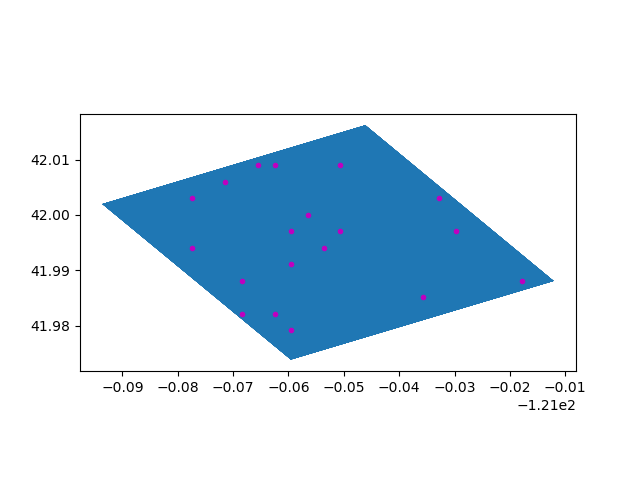

In [148]:
# No values to plot, just the shapes
# note the irregular spacing is because this is a sample, not the whole thing
ax = mergedSample[mergedSample['mergeKey']=='54c9424'].plot()
plt.plot(mergedSample[mergedSample['mergeKey']=='54c9424']['lon'], mergedSample[mergedSample['mergeKey']=='54c9424']['lat'], 'm.')

In [118]:
faparMergedSample = mergedSample[['mergeKey', 'lat', 'lon', 'faparVal', 'faparMask']]
faparMergedSample

,mergeKey,lat,lon,faparVal,faparMask
24814908,80c5d4,35.491071,-116.351190,0.044,False
22619458,80c05b,36.071429,-118.038690,0.252,False
28796714,80c4a3c,34.437500,-117.041667,0.072,False
6439993,809e7d,40.351190,-119.988095,0.112,False
8269759,54d4d9,39.866071,-123.940476,0.436,False
34838476,80d97b,32.839286,-116.532738,0.372,False
18332284,809595,37.205357,-118.955357,0.472,False
24084468,80cf54,35.684524,-115.547619,0.012,False
13043482,809a1d,38.604167,-120.247024,0.452,False
14482232,809ab04,38.223214,-121.488095,0.528,False


In [157]:
faparMergedSample[['faparVal', 'mergeKey']].groupby('mergeKey').agg(['min','max'])

ValueError: no results

In [149]:
#on sample data
start = time.time()
grouped = faparMergedSample.groupby('mergeKey')
groupedOut = grouped.agg(['min', 'max', 'mean', 'median', 'std', 'size', 'count', 'nunique'])
end = time.time()
print(f"Finished in {end - start:.2f} seconds")

Finished in 8.91 seconds


In [150]:
groupedOut

lat                                                        \
                min        max       mean     median       std size count   
mergeKey                                                                    
54c934    41.964286  42.053571  42.017121  42.017857  0.022173  182   182   
54c9354   41.961310  41.997024  41.976190  41.973214  0.009195   23    23   
54c935c   41.976190  42.005952  41.992630  41.994048  0.008184   21    21   
54c9364   41.994048  42.020833  42.008780  42.008929  0.007509   20    20   
54c9414   41.997024  42.023810  42.009334  42.008929  0.009152   22    22   
54c9424   41.979167  42.008929  41.995457  41.997024  0.009586   19    19   
54c942c   41.949405  41.985119  41.964732  41.964286  0.010412   20    20   
54c9434   41.937500  41.970238  41.954649  41.955357  0.008465   21    21   
54c943c   41.964286  41.991071  41.981261  41.982143  0.007421   27    27   
54c9444   41.952381  41.979167  41.967720  41.970238  0.008492   13    13   
54c944c   41.922619  41.955357  41.940193  41.940476  0.009120   21    21   
54c9454   41.907738  41.943452  41.926272  41.928571  0.009453   22    22   
54c945c   41.940476  41.970238  41.954018  41.953869  0.009031   20    20   
54c9464   41.961310  41.994048  41.979043  41.979167  0.008753   24    24   
54c946c   41.976190  42.014881  41.994685  41.995536  0.010696   28    28   
54c947c   41.988095  42.023810  42.007316  42.008929  0.008819   24    24   
54c9484   41.979167  42.011905  41.995833  41.994048  0.008105   25    25   
54c948c   41.952381  41.985119  41.963898  41.964286  0.008575   23    23   
54c9494   41.937500  41.964286  41.949091  41.946429  0.008053   19    19   
54c949c   41.964286  41.994048  41.977017  41.976190  0.008888   18    18   
54c94a4   41.946429  41.976190  41.964286  41.964286  0.010310   17    17   
54c94ac   41.934524  41.970238  41.951058  41.947917  0.011649   18    18   
54c94b4   41.904762  41.940476  41.922619  41.922619  0.008978   21    21   
54c94bc   41.919643  41.952381  41.936625  41.937500  0.010770   17    17   
54c94c    41.848214  42.005952  41.930570  41.934524  0.037727  332   332   
54c94c4   41.895833  41.925595  41.911644  41.912202  0.009074   16    16   
54c94cc   41.877976  41.913690  41.894751  41.895833  0.010927   22    22   
54c94d4   41.854167  41.880952  41.864989  41.864583  0.007549   22    22   
54c94dc   41.866071  41.895833  41.880766  41.879464  0.008658   16    16   
54c94e4   41.877976  41.910714  41.894886  41.892857  0.008183   22    22   
...             ...        ...        ...        ...       ...  ...   ...   
80ed2d4   35.648810  35.693452  35.672917  35.674107  0.012770   20    20   
80ed2f    35.529762  35.619048  35.580608  35.583333  0.025242   83    83   
80ed31    35.505952  35.601190  35.552853  35.553571  0.024684   87    87   
80ed33    35.586310  35.681548  35.632552  35.629464  0.024395   80    80   
80ed35    35.559524  35.651786  35.603492  35.604167  0.024710   75    75   
80ee9f    34.461310  34.559524  34.508078  34.502976  0.025359   77    77   
80eea1    34.491071  34.583333  34.537111  34.538690  0.024023   81    81   
80eea3    34.410714  34.502976  34.456482  34.458333  0.026412   82    82   
80eea34   34.422619  34.461310  34.442626  34.440476  0.010746   18    18   
80eea3c   34.461310  34.500000  34.481737  34.480655  0.012367   22    22   
80eea44   34.476190  34.520833  34.495833  34.497024  0.013827   25    25   
80eea4c   34.437500  34.479167  34.453208  34.447917  0.012864   18    18   
80eea5    34.431548  34.532738  34.481669  34.480655  0.023612   88    88   
80eea54   34.443452  34.491071  34.472222  34.476190  0.015880   18    18   
80eea5c   34.491071  34.529762  34.505787  34.505952  0.011205   18    18   
80eea7    34.520833  34.604167  34.562768  34.565476  0.024049  100   100   
80eea9    34.538690  34.636905  34.587909  34.584821  0.025567   80    80   
80eeab    34.562500  34.663690  34.617767  34.613095  0.025795   86    86   
80eead    34

In [151]:
groupedOut.columns

MultiIndex(levels=[['lat', 'lon', 'faparMask'], ['min', 'max', 'mean', 'median', 'std', 'size', 'count', 'nunique']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7]])

In [174]:
#on sample data
start = time.time()
groupedOut2 = pd.DataFrame()
groupedOut2['mergeKey'] = grouped.indices
groupedOut2['faparVal_myMean'] = grouped.apply(myMean)
groupedOut2['faparVal_myMedian'] = grouped.apply(myMedian)
groupedOut2['faparVal_myStd'] = grouped.apply(myStd)
#groupedOut2['faparVal_min'] = grouped.apply(myMin)
#groupedOut2['faparVal_max'] = grouped.apply(myMax)
end = time.time()
print(f"Finished in {end - start:.2f} seconds")
groupedOut2

/home/scott/anaconda3/envs/sat/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


Finished in 12.65 seconds


,mergeKey,faparVal_myMean,faparVal_myMedian,faparVal_myStd
54c934,54c934,0.244,0.226,0.0799359
54c9354,54c9354,0.221538,0.208,0.0446949
54c935c,54c935c,0.259059,0.24,0.083686
54c9364,54c9364,0.262571,0.214,0.104511
54c9414,54c9414,0.26,0.248,0.0385054
54c9424,54c9424,--,--,--
54c942c,54c942c,--,--,--
54c9434,54c9434,--,--,--
54c943c,54c943c,--,--,--
54c9444,54c9444,0.3096,0.312,0.0275507


In [181]:
start = time.time()

aggedFapar = faparMergedSample[['faparVal', 'mergeKey']].groupby('mergeKey').agg(['min','max', 'size', 'count', 'nunique'])
aggedFapar


end = time.time()
print(f"Finished in {end - start:.2f} seconds")

Finished in 340.68 seconds


In [182]:
start = time.time()

agged2 = groupedOut.copy()
agged2 = agged2.merge(aggedFapar, on = 'mergeKey')
agged2.columns = ['_'.join(col).strip() for col in agged2.columns.values]

end = time.time()
print(f"Finished in {end - start:.2f} seconds")
agged2.columns


Finished in 0.02 seconds


Index(['lat_min', 'lat_max', 'lat_mean', 'lat_median', 'lat_std', 'lat_size',
       'lat_count', 'lat_nunique', 'lon_min', 'lon_max', 'lon_mean',
       'lon_median', 'lon_std', 'lon_size', 'lon_count', 'lon_nunique',
       'faparMask_min', 'faparMask_max', 'faparMask_mean', 'faparMask_median',
       'faparMask_std', 'faparMask_size', 'faparMask_count',
       'faparMask_nunique', 'faparVal_min', 'faparVal_max', 'faparVal_size',
       'faparVal_count', 'faparVal_nunique'],
      dtype='object')

In [183]:
start = time.time()

agged3 = agged2.merge(groupedOut2, on='mergeKey')

end = time.time()
print(f"Finished in {end - start:.2f} seconds")
agged3.columns


Finished in 0.03 seconds


Index(['mergeKey', 'lat_min', 'lat_max', 'lat_mean', 'lat_median', 'lat_std',
       'lat_size', 'lat_count', 'lat_nunique', 'lon_min', 'lon_max',
       'lon_mean', 'lon_median', 'lon_std', 'lon_size', 'lon_count',
       'lon_nunique', 'faparMask_min', 'faparMask_max', 'faparMask_mean',
       'faparMask_median', 'faparMask_std', 'faparMask_size',
       'faparMask_count', 'faparMask_nunique', 'faparVal_min', 'faparVal_max',
       'faparVal_size', 'faparVal_count', 'faparVal_nunique',
       'faparVal_myMean', 'faparVal_myMedian', 'faparVal_myStd'],
      dtype='object')

In [184]:
#target columns
fapar2016.columns

Index(['Unnamed: 0', 'mergeKey', 'lat_min', 'lat_max', 'lat_myMean',
       'lat_myMedian', 'lat_myStd', 'lat_size', 'lat_count', 'lat_nunique',
       'lon_min', 'lon_max', 'lon_myMean', 'lon_myMedian', 'lon_myStd',
       'lon_size', 'lon_count', 'lon_nunique', 'faparVal_min', 'faparVal_max',
       'faparVal_myMean', 'faparVal_myMedian', 'faparVal_myStd',
       'faparVal_size', 'faparVal_count', 'faparVal_nunique', 'faparMask_min',
       'faparMask_max', 'faparMask_myMean', 'faparMask_myMedian',
       'faparMask_myStd', 'faparMask_size', 'faparMask_count',
       'faparMask_nunique', 'date'],
      dtype='object')

In [185]:
colCompare = fapar2016.columns.difference(agged3.columns)
colCompare

Index(['Unnamed: 0', 'date', 'faparMask_myMean', 'faparMask_myMedian',
       'faparMask_myStd', 'lat_myMean', 'lat_myMedian', 'lat_myStd',
       'lon_myMean', 'lon_myMedian', 'lon_myStd'],
      dtype='object')

In [186]:
colCompare2 = agged3.columns.difference(fapar2016.columns)
colCompare2

Index(['faparMask_mean', 'faparMask_median', 'faparMask_std', 'lat_mean',
       'lat_median', 'lat_std', 'lon_mean', 'lon_median', 'lon_std'],
      dtype='object')

#### These differences are fine, just need to add the date to the agged3 dataframe

In [187]:
date

'20160110'

In [188]:
dateFormatted = date[0:4] + '-' + date[4:6] + '-' + date[6:]
dateFormatted

'2016-01-10'

In [189]:
agged3['date'] = dateFormatted
agged3.head()

,mergeKey,lat_min,lat_max,lat_mean,lat_median,lat_std,lat_size,lat_count,lat_nunique,lon_min,...,faparMask_nunique,faparVal_min,faparVal_max,faparVal_size,faparVal_count,faparVal_nunique,faparVal_myMean,faparVal_myMedian,faparVal_myStd,date
0,54c934,41.964286,42.053571,42.017121,42.017857,0.022173,182,182,30,-121.595238,...,2,0.168,0.252,182,182,35,0.244,0.226,0.0799359,2016-01-10
1,54c9354,41.961310,41.997024,41.976190,41.973214,0.009195,23,23,12,-121.520833,...,2,0.252,0.252,23,23,8,0.221538,0.208,0.0446949,2016-01-10
2,54c935c,41.976190,42.005952,41.992630,41.994048,0.008184,21,21,10,-121.473214,...,2,0.120,0.348,21,21,15,0.259059,0.24,0.083686,2016-01-10
3,54c9364,41.994048,42.020833,42.008780,42.008929,0.007509,20,20,9,-121.422619,...,2,0.000,0.000,20,20,10,0.262571,0.214,0.104511,2016-01-10
4,54c9414,41.997024,42.023810,42.009334,42.008929,0.009152,22,22,10,-121.166667,...,2,0.000,0.000,22,22,1,0.26,0.248,0.0385054,2016-01-10


In [190]:
ca_s2_df['mergeKey'] = ca_s2_df['S2_Cells_I']
df = ca_s2_df.merge(agged3, on = 'mergeKey')
len(df)

10643

In [192]:
df.head()

,CWA,NAME,STATE_ZONE,FE_AREA,AREA,WF_cum_are,FZ_grp,S2_Cells_I,geometry,mergeKey,...,faparMask_nunique,faparVal_min,faparVal_max,faparVal_size,faparVal_count,faparVal_nunique,faparVal_myMean,faparVal_myMedian,faparVal_myStd,date
0,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8a4,POLYGON ((-116.9852421934208 36.92851788893871...,80b8a4,...,1,0.012,0.436,354,354,299,0.0670056,0.052,0.0450968,2016-01-10
1,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...,80b8ac,...,2,0.000,0.272,341,341,268,0.0509059,0.04,0.0419095,2016-01-10
2,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8b4,POLYGON ((-117.1735315927328 37.04169221702246...,80b8b4,...,2,0.020,0.452,344,344,302,0.14152,0.096,0.106551,2016-01-10
3,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80be44,POLYGON ((-118.2994349957241 37.38986432048104...,80be44,...,2,0.028,0.372,308,308,267,0.185755,0.19,0.13266,2016-01-10
4,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80be4c,POLYGON ((-118.2994349957241 37.23225420438236...,80be4c,...,1,0.004,0.328,320,320,259,0.064875,0.04,0.0665885,2016-01-10


In [193]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [195]:
df.dtypes

CWA                   object
NAME                  object
STATE_ZONE            object
FE_AREA               object
AREA                 float64
WF_cum_are           float64
FZ_grp                object
S2_Cells_I            object
geometry              object
mergeKey              object
lat_min              float64
lat_max              float64
lat_mean             float64
lat_median           float64
lat_std              float64
lat_size               int64
lat_count              int64
lat_nunique            int64
lon_min              float64
lon_max              float64
lon_mean             float64
lon_median           float64
lon_std              float64
lon_size               int64
lon_count              int64
lon_nunique            int64
faparMask_min           bool
faparMask_max           bool
faparMask_mean       float64
faparMask_median     float64
faparMask_std        float64
faparMask_size         int64
faparMask_count        int64
faparMask_nunique      int64
faparVal_min  

In [205]:
df2 = df.copy()
df2['faparVal_myMean'] = df['faparVal_myMean'].astype('float64')

In [206]:
df2['faparVal_myMean'].dtype

dtype('float64')

In [207]:
df.dtypes

CWA                   object
NAME                  object
STATE_ZONE            object
FE_AREA               object
AREA                 float64
WF_cum_are           float64
FZ_grp                object
S2_Cells_I            object
geometry              object
mergeKey              object
lat_min              float64
lat_max              float64
lat_mean             float64
lat_median           float64
lat_std              float64
lat_size             float64
lat_count            float64
lat_nunique          float64
lon_min              float64
lon_max              float64
lon_mean             float64
lon_median           float64
lon_std              float64
lon_size             float64
lon_count            float64
lon_nunique          float64
faparMask_min        float64
faparMask_max        float64
faparMask_mean       float64
faparMask_median     float64
faparMask_std        float64
faparMask_size       float64
faparMask_count      float64
faparMask_nunique    float64
faparVal_min  

<IPython.core.display.Javascript object>


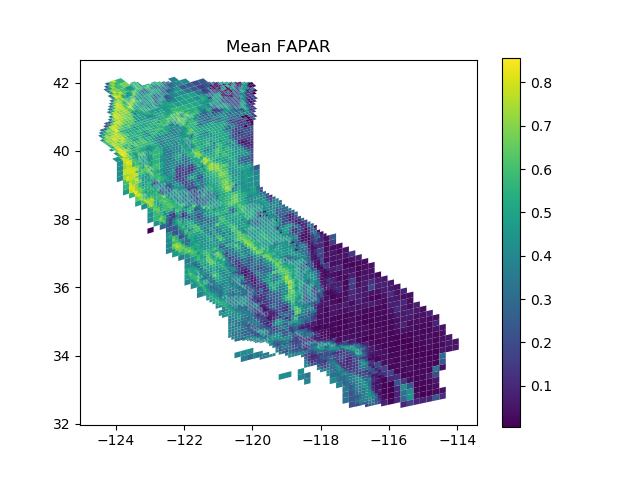

Text(0.5, 1.0, 'Mean FAPAR')

In [215]:
ax = df2.plot(column = 'faparVal_myMean', label = 'Mean FAPAR', legend = True)
plt.title('Mean FAPAR')

<IPython.core.display.Javascript object>


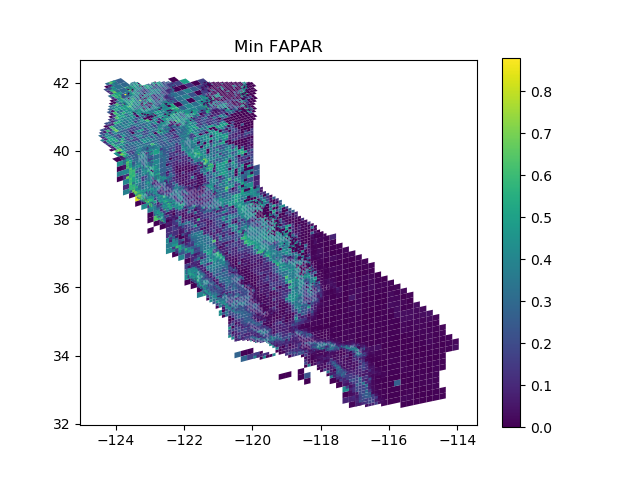

Text(0.5, 1.0, 'Min FAPAR')

In [216]:
ax = df2.plot(column = 'faparVal_min', label = 'Min FAPAR', legend = True)
plt.title('Min FAPAR')

<IPython.core.display.Javascript object>


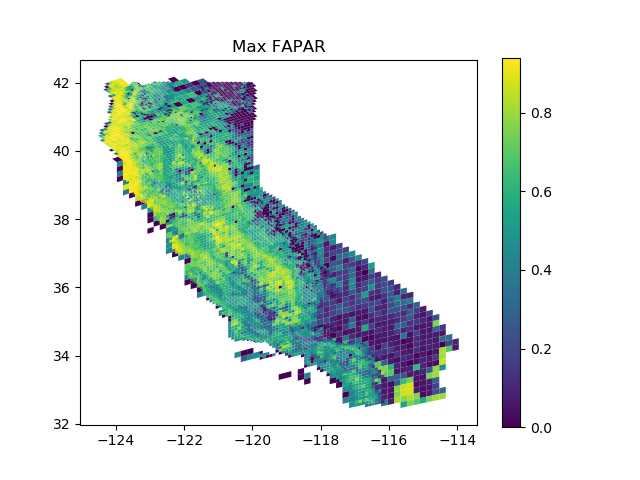

Text(0.5, 1.0, 'Max FAPAR')

In [217]:
ax = df2.plot(column = 'faparVal_max', label = 'Max FAPAR', legend = True)
plt.title('Max FAPAR')

<IPython.core.display.Javascript object>


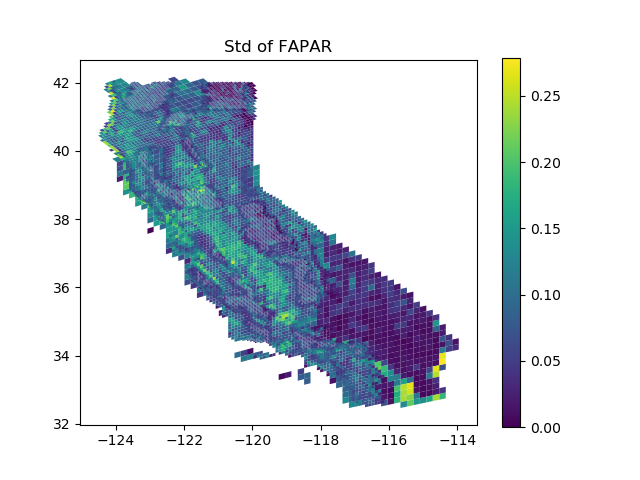

Text(0.5, 1.0, 'Std of FAPAR')

In [224]:
df2['faparVal_myStd'] = df2['faparVal_myStd'].astype('float64')
ax = df2.plot(column = 'faparVal_myStd', label = 'Std of FAPAR', legend = True)
plt.title('Std of FAPAR')

/home/scott/anaconda3/envs/sat/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:702: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)


<IPython.core.display.Javascript object>


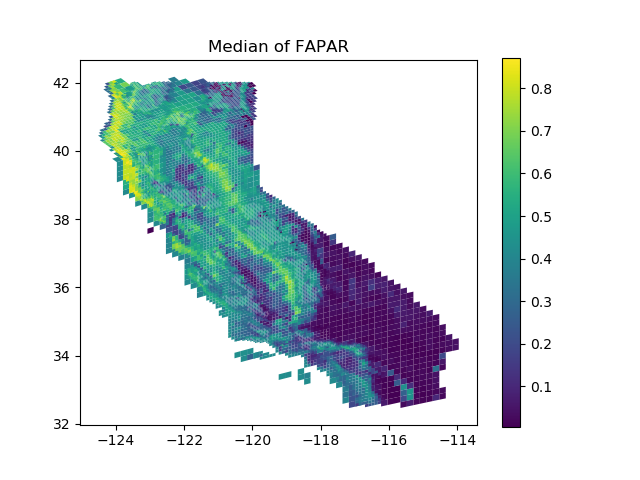

Text(0.5, 1.0, 'Median of FAPAR')

In [225]:
df2['faparVal_myMedian'] = df2['faparVal_myMedian'].astype('float64')
ax = df2.plot(column = 'faparVal_myMedian', label = 'Median of FAPAR', legend = True)
plt.title('Median of FAPAR')

In [76]:
#for year in range(2016, 2019):
year = 2016
dates = []


data_dir = '/home/scott/sat_aggs/'
csvfiles = {}
for dirpath, dirnames, filenames in os.walk(data_dir):
    for filename in [f for f in filenames if f.endswith(".csv")]:
        csvfiles[filename] = (os.path.join(dirpath, filename))

for filename, fullpath in csvfiles.items():
    dateStart = filename.find(str(year))
    if dateStart!= -1: #file includes date of interest
        date = filename[dateStart:dateStart+8]  # 20161031 for example
        dateFormatted = date[0:4] + '-' + date[4:6] + '-' + date[6:]   #2016-10-31 for example
        dates.append(date)
        with open(fullpath, 'rb') as f:
            df = pd.read_csv(f)
        df['date'] = dateFormatted
        df2 = df.drop(['latIdx_min',
               'latIdx_max',
               'latIdx_myMean',
               'latIdx_myMedian',
               'latIdx_myStd',
               'latIdx_size',
               'latIdx_count',
               'latIdx_nunique',
               'lonIdx_min',
               'lonIdx_max',
               'lonIdx_myMean',
               'lonIdx_myMedian',
               'lonIdx_myStd',
               'lonIdx_size',
               'lonIdx_count',
               'lonIdx_nunique'],
              axis = 1)
        df2.to_csv(data_dir + 'dated/' + filename[0:-4] + '_date' + filename[-4:])  #/home/scott/sat_aggs/20161031_agg_date.csv for example


sorted(dates)

['20160110',
 '20160120',
 '20160131',
 '20160210',
 '20160220',
 '20160229',
 '20160310',
 '20160320',
 '20160331',
 '20160410',
 '20160420',
 '20160430',
 '20160510',
 '20160520',
 '20160531',
 '20160610',
 '20160620',
 '20160630',
 '20160710',
 '20160720',
 '20160731',
 '20160810',
 '20160820',
 '20160831',
 '20160910',
 '20160920',
 '20160930',
 '20161010',
 '20161020',
 '20161031',
 '20161110',
 '20161120',
 '20161130',
 '20161210',
 '20161220',
 '20161231']

In [77]:
dates = []
data_dir = '/home/scott/sat_aggs/'
csvfiles = {}
for dirpath, dirnames, filenames in os.walk(data_dir):
    for filename in [f for f in filenames if f.endswith(".csv")]:
        csvfiles[filename] = (os.path.join(dirpath, filename))

for year in range(2017, 2019):
    #year = 2016

    for filename, fullpath in csvfiles.items():
        dateStart = filename.find(str(year))
        if dateStart!= -1: #file includes date of interest
            date = filename[dateStart:dateStart+8]  # 20161031 for example
            dateFormatted = date[0:4] + '-' + date[4:6] + '-' + date[6:]   #2016-10-31 for example
            dates.append(date)
            with open(fullpath, 'rb') as f:
                df = pd.read_csv(f)
            df['date'] = dateFormatted
            df2 = df.drop(['latIdx_min',
                   'latIdx_max',
                   'latIdx_myMean',
                   'latIdx_myMedian',
                   'latIdx_myStd',
                   'latIdx_size',
                   'latIdx_count',
                   'latIdx_nunique',
                   'lonIdx_min',
                   'lonIdx_max',
                   'lonIdx_myMean',
                   'lonIdx_myMedian',
                   'lonIdx_myStd',
                   'lonIdx_size',
                   'lonIdx_count',
                   'lonIdx_nunique'],
                  axis = 1)
            df2.to_csv(data_dir + 'dated/' + filename[0:-4] + '_date' + filename[-4:])  #/home/scott/sat_aggs/20161031_agg_date.csv for example


sorted(dates)

['20170110',
 '20170120',
 '20170131',
 '20170210',
 '20170220',
 '20170228',
 '20170310',
 '20170320',
 '20170331',
 '20170410',
 '20170420',
 '20170430',
 '20170510',
 '20170520',
 '20170531',
 '20170610',
 '20170620',
 '20170630',
 '20170710',
 '20170720',
 '20170731',
 '20170810',
 '20170820',
 '20170831',
 '20170910',
 '20170920',
 '20170930',
 '20171010',
 '20171020',
 '20171031',
 '20171110',
 '20171120',
 '20171130',
 '20171210',
 '20171220',
 '20171231',
 '20180110',
 '20180120',
 '20180131',
 '20180210',
 '20180220',
 '20180228',
 '20180310',
 '20180320',
 '20180331',
 '20180410',
 '20180420',
 '20180430',
 '20180510',
 '20180520',
 '20180531',
 '20180610',
 '20180620',
 '20180630',
 '20180710',
 '20180720',
 '20180731',
 '20180810',
 '20180820',
 '20180831',
 '20180910',
 '20180920',
 '20180930',
 '20181010',
 '20181020',
 '20181031',
 '20181110',
 '20181120',
 '20181130',
 '20181210',
 '20181220',
 '20181231']